In [1]:
%matplotlib inline 
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os 
import gcsfs 
from matplotlib import cm
import warnings 
import seaborn as sns
import yaml

from xclim.indicators import cf 
from xclim.indicators import icclim, atmos, anuclim

# from science_validation_manual import *
from dc6_functions import * 
from scipy.stats import kstest

import dask
import dask.array as da
import dask.distributed as dd
import rhg_compute_tools.kubernetes as rhgk
import pandas as pd 

import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

import json 

/tmp/ipykernel_16771/4096995225.py:25: DeprecationWarning: rhg_compute_tools and the associated command-line application rctools are
deprecated on catalyst clusters. use catalyst_compute_tools instead.
See https://gitlab.com/crs-catalyst/infrastructure/catalyst_compute_tools/-/issues/1
  import rhg_compute_tools.kubernetes as rhgk


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# plot_dir = '/gcs/impactlab-data/climate/downscaling/paper/'
plot_dir = '/home/jovyan/paper_figures/'

In [4]:
models_dict = get_cmip6_models()
ensemble_members = get_cmip6_ensemble_members()
grids = get_cmip6_grids()
institutions = get_cmip6_institutions()
ds_institutions = get_cmip6_institutions()
ds_institutions['MPI-ESM1-2-HR'] = 'MPI-M'

cities = get_diagnostic_cities()

In [5]:
len(cities)

17

In [6]:
cities

['Tokyo',
 'Delhi',
 'Shanghai',
 'Sao Paulo',
 'Mexico City',
 'Cairo',
 'Dhaka',
 'New York',
 'Buenos Aires',
 'Istanbul',
 'Lagos',
 'Paris',
 'Moscow',
 'Miami',
 'Mumbai',
 'Manila',
 'London']

In [7]:
coastal_cities = ['Sao Paulo', 'Miami', 'New York', 'Manila', 'Istanbul', 'Mumbai', 
                  'Buenos Aires', 'Tokyo', 'London']
non_coastal_cities = ['Paris', 'Shanghai', 
                      'Lagos', 'Delhi', 'Dhaka', 'Mexico City', 'Cairo', 'Moscow']

In [8]:
city = 'Buenos Aires'
with open('/home/jovyan/paper_data/downscaled_{city}.json'.format(city=city)) as fp:
    downscaled_ks_full = json.load(fp)
    
with open('/home/jovyan/paper_data/gcms_{city}.json'.format(city=city)) as fp:
    gcms_ks_full = json.load(fp)

In [9]:
cities

['Tokyo',
 'Delhi',
 'Shanghai',
 'Sao Paulo',
 'Mexico City',
 'Cairo',
 'Dhaka',
 'New York',
 'Buenos Aires',
 'Istanbul',
 'Lagos',
 'Paris',
 'Moscow',
 'Miami',
 'Mumbai',
 'Manila',
 'London']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


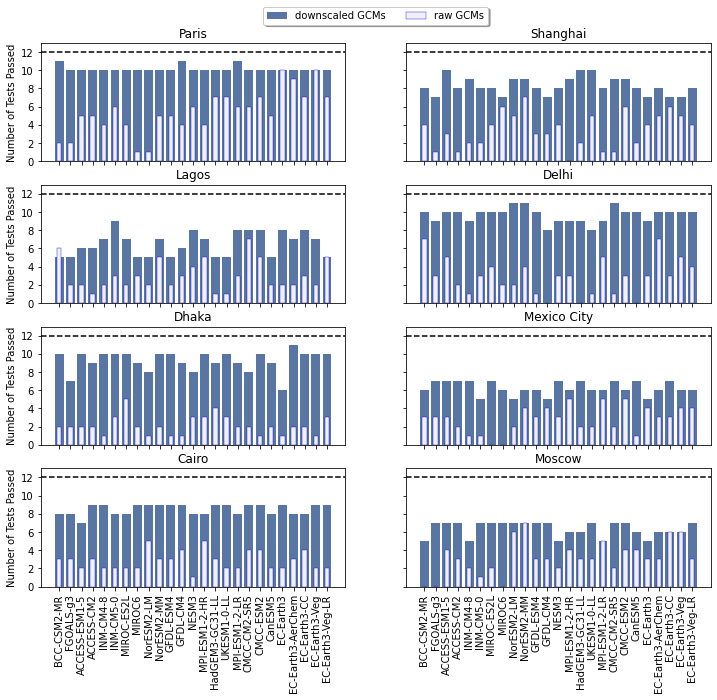

In [15]:
fig, axes = plt.subplots(4, 2, figsize=(12, 10), sharex=True,sharey=True)

# cities_subset = ['Paris', 'Delhi', 'Istanbul', 'Shanghai', 'Lagos', 'Dhaka', 'London', 'Cairo']
    
for i, city in enumerate(non_coastal_cities):
    
    with open('/home/jovyan/paper_data/downscaled_{city}.json'.format(city=city)) as fp:
        downscaled_ks_full = json.load(fp)
    
    with open('/home/jovyan/paper_data/gcms_{city}.json'.format(city=city)) as fp:
        gcms_ks_full = json.load(fp)
        
    ax = axes.flat[i]
    
    ax.bar(*zip(*downscaled_ks_full.items()), width=0.8, linewidth=0.4, 
           # color='forestgreen', 
           color='#5975a4',
           align='center', label='downscaled GCMs')
    ax.bar(*zip(*gcms_ks_full.items()), width=0.4, linewidth=0.4, 
           #color='orange', 
           color='#f0f1f2',
           
           align='center', label='raw GCMs', 
           edgecolor='blue')
    ax.set_title('{city}'.format(city=city))
    ax.set_ylim([0, 13])
    ax.axhline(y=12, color='k', linestyle='--')
    ax.set_yticks([0, 2, 4, 6, 8, 10, 12])

axes[3, 0].tick_params(axis='x', rotation=90)
axes[3, 1].tick_params(axis='x', rotation=90)
axes[0, 0].set_ylabel('Number of Tests Passed')
axes[1, 0].set_ylabel('Number of Tests Passed')
axes[2, 0].set_ylabel('Number of Tests Passed')
axes[3, 0].set_ylabel('Number of Tests Passed')
# axes[3, 0] .set_ylim([0, 13])
'''axes[1, 2].tick_params(axis='x', rotation=80)
axes[1, 3].tick_params(axis='x', rotation=80)'''

axes[0, 0].legend(loc='upper center', bbox_to_anchor=(1.1, 1.35),
          ncol=2, fancybox=True, shadow=True)

plt.savefig(os.path.join(plot_dir, 'noncoastal_etccdi_indices.eps'), 
            bbox_inches='tight', dpi=200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


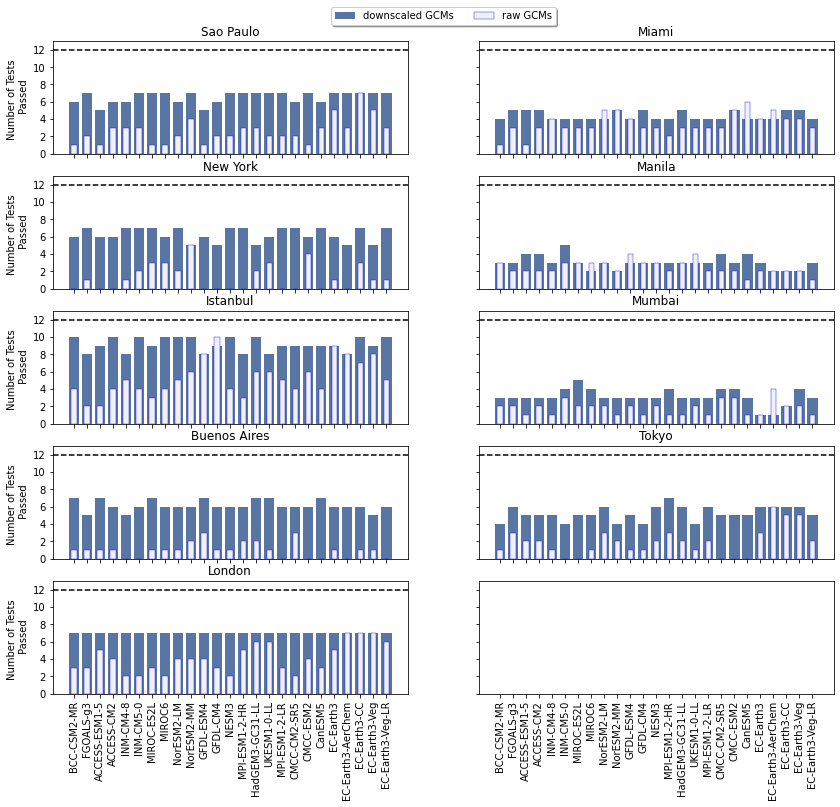

In [22]:
fig, axes = plt.subplots(5, 2, figsize=(14, 12), sharex=True,sharey=True)

for i, city in enumerate(coastal_cities):
    
    with open('/home/jovyan/paper_data/downscaled_{city}.json'.format(city=city)) as fp:
        downscaled_ks_full = json.load(fp)
    
    with open('/home/jovyan/paper_data/gcms_{city}.json'.format(city=city)) as fp:
        gcms_ks_full = json.load(fp)
        
    ax = axes.flat[i]
    
    ax.bar(*zip(*downscaled_ks_full.items()), width=0.8, linewidth=0.4, 
           # color='forestgreen', 
           color='#5975a4',
           align='center', label='downscaled GCMs')
    ax.bar(*zip(*gcms_ks_full.items()), width=0.4, linewidth=0.4, 
           #color='orange', 
           color='#f0f1f2',
           
           align='center', label='raw GCMs', 
           edgecolor='blue')
    ax.set_title('{city}'.format(city=city))
    ax.set_ylim([0, 13])
    ax.axhline(y=12, color='k', linestyle='--')
    ax.set_yticks([0, 2, 4, 6, 8, 10, 12])

axes[4, 0].tick_params(axis='x', rotation=90)
axes[4, 1].tick_params(axis='x', rotation=90)
axes[0, 0].set_ylabel('Number of Tests \n Passed')
axes[1, 0].set_ylabel('Number of Tests \n Passed')
axes[2, 0].set_ylabel('Number of Tests \n Passed')
axes[3, 0].set_ylabel('Number of Tests \n Passed')
axes[4, 0].set_ylabel('Number of Tests \n Passed')
# axes[3, 0] .set_ylim([0, 13])
'''axes[1, 2].tick_params(axis='x', rotation=80)
axes[1, 3].tick_params(axis='x', rotation=80)'''

axes[0, 0].legend(loc='upper center', bbox_to_anchor=(1.1, 1.35),
          ncol=2, fancybox=True, shadow=True)

plt.savefig(os.path.join(plot_dir, 'coastal_etccdi_indices.eps'), 
            bbox_inches='tight', dpi=200)

In [ ]:
with open('/home/jovyan/paper_data/gcms_test_descriptions_Miami.json') as fp:
    test2 = json.load(fp)

In [ ]:
test2